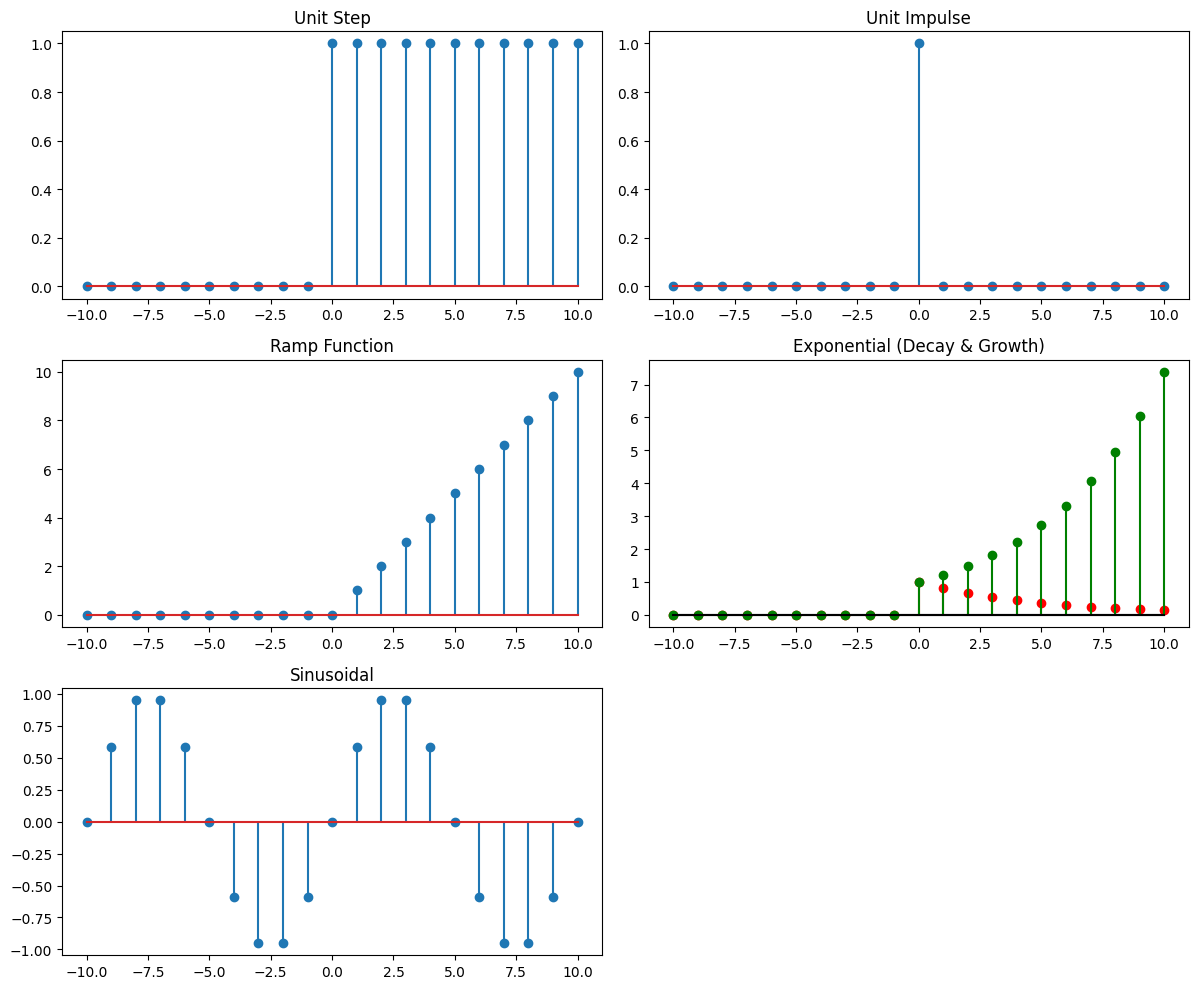

In [3]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(-10, 11)  # discrete time index

# (a) Unit Step
u = np.heaviside(n, 1)

# (b) Unit Impulse
delta = np.where(n == 0, 1, 0)

# (c) Ramp Function
ramp = n * (n >= 0)

# (d) Exponential (decaying & growing)
decay = np.exp(-0.2 * n) * (n >= 0)
grow = np.exp(0.2 * n) * (n >= 0)

# (e) Sinusoidal
sinusoid = np.sin(0.2 * np.pi * n)

plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.stem(n, u)
plt.title("Unit Step")

plt.subplot(3, 2, 2)
plt.stem(n, delta)
plt.title("Unit Impulse")

plt.subplot(3, 2, 3)
plt.stem(n, ramp)
plt.title("Ramp Function")

plt.subplot(3, 2, 4)
plt.stem(n, decay, linefmt='r-', markerfmt='ro', basefmt='k-')
plt.stem(n, grow, linefmt='g-', markerfmt='go', basefmt='k-')
plt.title("Exponential (Decay & Growth)")

plt.subplot(3, 2, 5)
plt.stem(n, sinusoid)
plt.title("Sinusoidal")

plt.tight_layout()
plt.show()


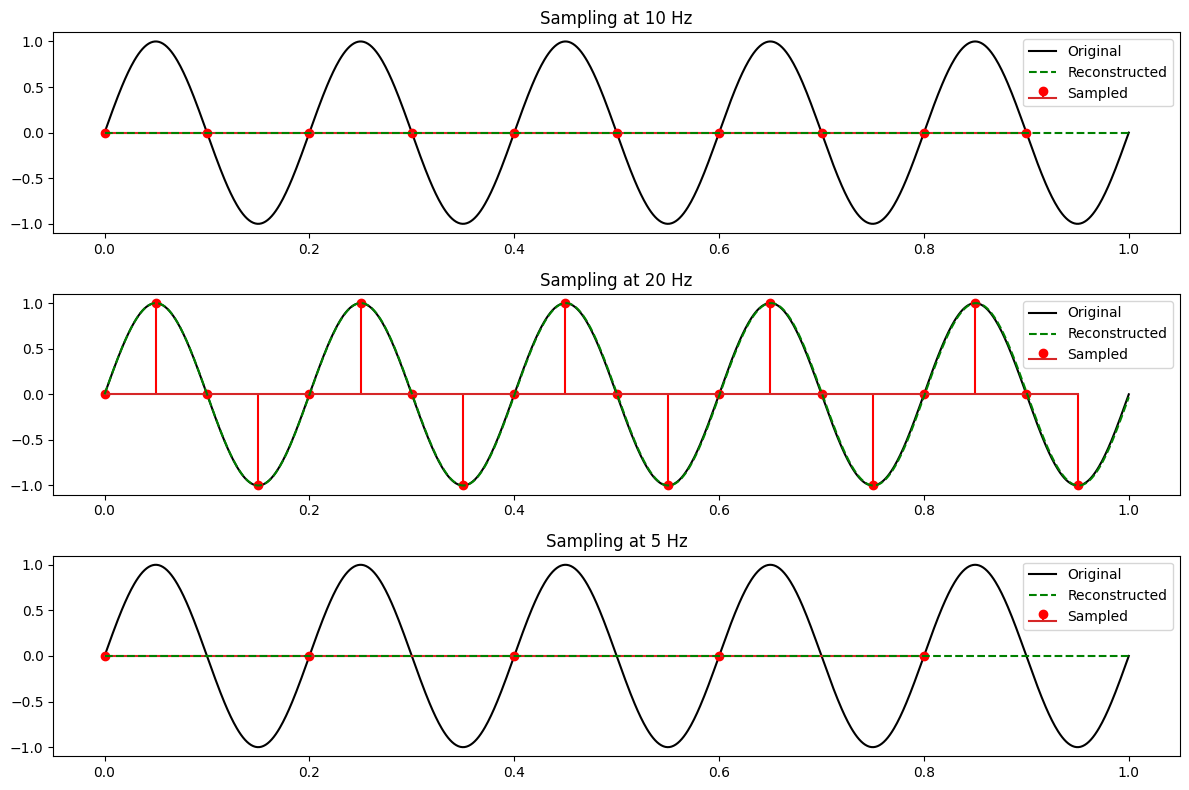

In [5]:
from scipy.signal import resample

# Continuous signal
t = np.linspace(0, 1, 1000)
f = 5  # frequency in Hz
x = np.sin(2 * np.pi * f * t)

# Nyquist rate (2f), above (4f), below (0.5f)
fs_list = [2*f, 4*f, f]  

plt.figure(figsize=(12, 8))
for i, fs in enumerate(fs_list, 1):
    Ts = 1/fs
    n = np.arange(0, 1, Ts)
    x_sampled = np.sin(2 * np.pi * f * n)
    
    # Reconstruction by resampling
    x_recon = resample(x_sampled, len(t))
    
    plt.subplot(3, 1, i)
    plt.plot(t, x, 'k', label="Original")
    plt.stem(n, x_sampled, 'r', label="Sampled")
    plt.plot(t, x_recon, 'g--', label="Reconstructed")
    plt.title(f"Sampling at {fs} Hz")
    plt.legend()

plt.tight_layout()
plt.show()

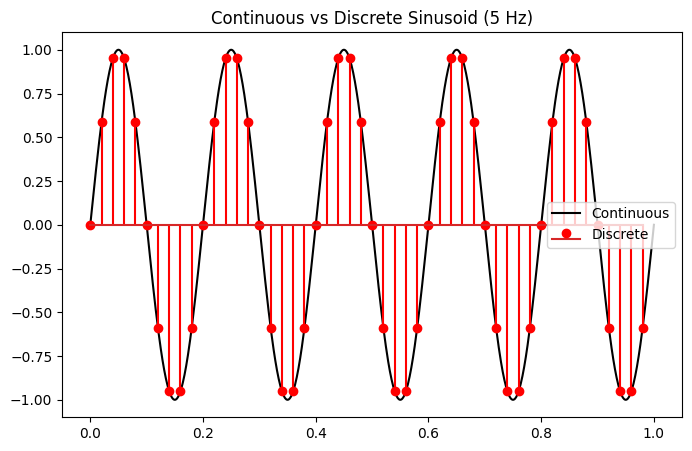

In [7]:
A = 1
f = 5  # Hz
T = 1  # duration
fs = 50  # sampling frequency

t_cont = np.linspace(0, T, 1000)
x_cont = A * np.sin(2 * np.pi * f * t_cont)

t_disc = np.arange(0, T, 1/fs)
x_disc = A * np.sin(2 * np.pi * f * t_disc)

plt.figure(figsize=(8, 5))
plt.plot(t_cont, x_cont, 'k', label="Continuous")
plt.stem(t_disc, x_disc, 'r', label="Discrete")
plt.legend()
plt.title("Continuous vs Discrete Sinusoid (5 Hz)")
plt.show()


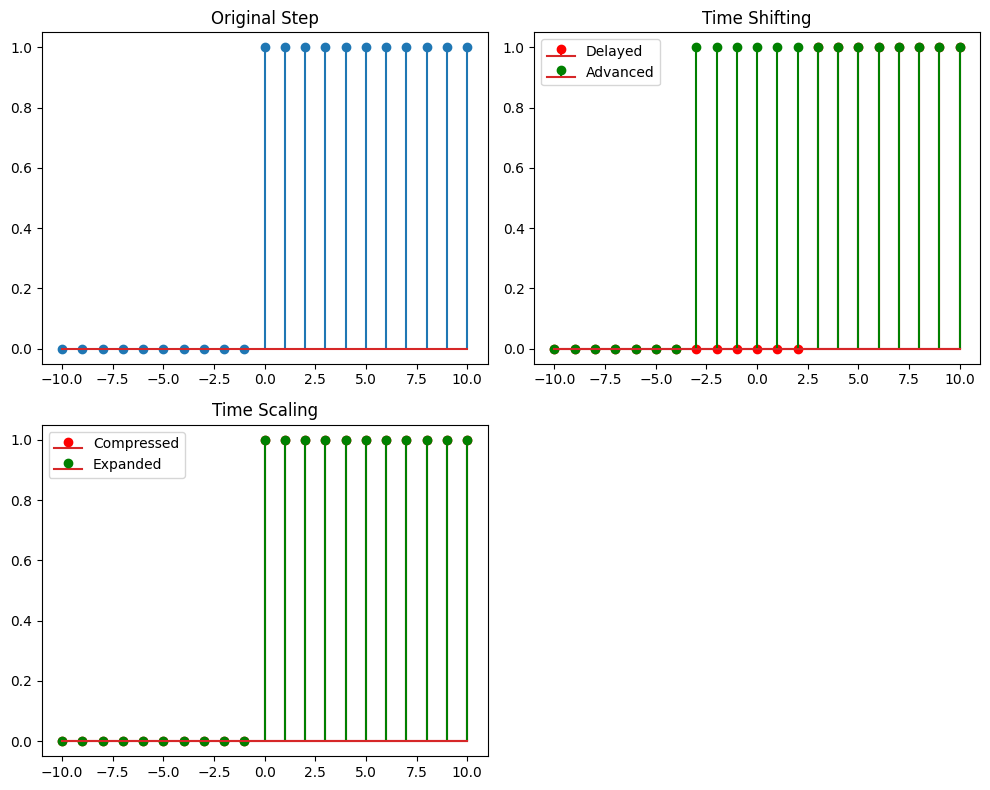

In [8]:
n = np.arange(-10, 11)
u = np.heaviside(n, 1)

# Time Shifting
u_delayed = np.heaviside(n-3, 1)  # shift right by 3
u_advanced = np.heaviside(n+3, 1) # shift left by 3

# Time Scaling
u_compressed = np.heaviside(2*n, 1)  # compress
u_expanded = np.heaviside(n/2, 1)    # expand

plt.figure(figsize=(10, 8))

plt.subplot(2,2,1)
plt.stem(n, u)
plt.title("Original Step")

plt.subplot(2,2,2)
plt.stem(n, u_delayed, 'r', label="Delayed")
plt.stem(n, u_advanced, 'g', label="Advanced")
plt.legend()
plt.title("Time Shifting")

plt.subplot(2,2,3)
plt.stem(n, u_compressed, 'r', label="Compressed")
plt.stem(n, u_expanded, 'g', label="Expanded")
plt.legend()
plt.title("Time Scaling")

plt.tight_layout()
plt.show()


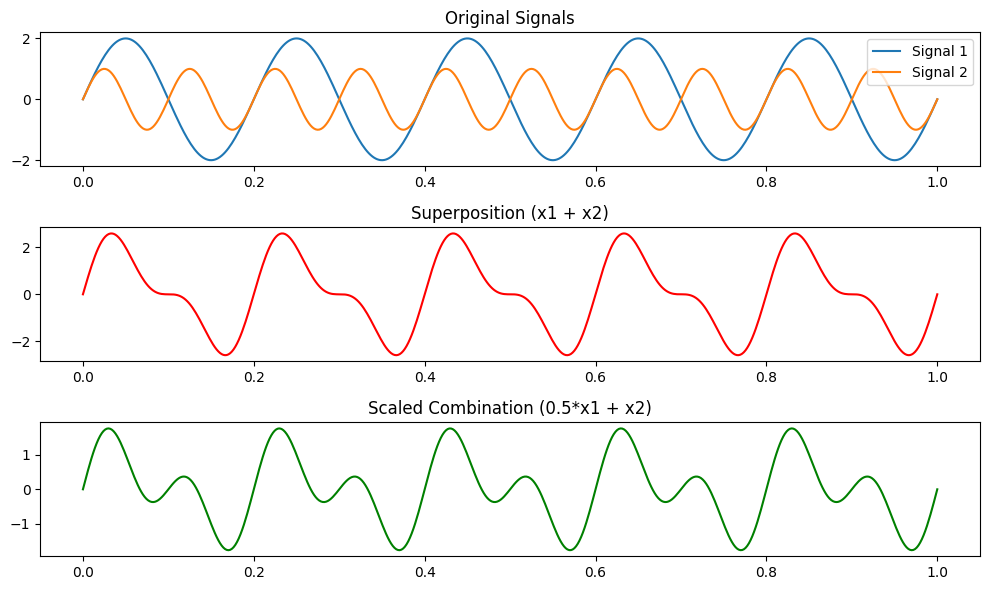

In [9]:
t = np.linspace(0, 1, 500)
x1 = 2 * np.sin(2*np.pi*5*t)   # amplitude 2, freq 5Hz
x2 = 1 * np.sin(2*np.pi*10*t)  # amplitude 1, freq 10Hz

x_sum = x1 + x2
x_scaled = 0.5 * x1 + x2

plt.figure(figsize=(10,6))

plt.subplot(3,1,1)
plt.plot(t, x1, label="Signal 1")
plt.plot(t, x2, label="Signal 2")
plt.legend()
plt.title("Original Signals")

plt.subplot(3,1,2)
plt.plot(t, x_sum, 'r')
plt.title("Superposition (x1 + x2)")

plt.subplot(3,1,3)
plt.plot(t, x_scaled, 'g')
plt.title("Scaled Combination (0.5*x1 + x2)")

plt.tight_layout()
plt.show()


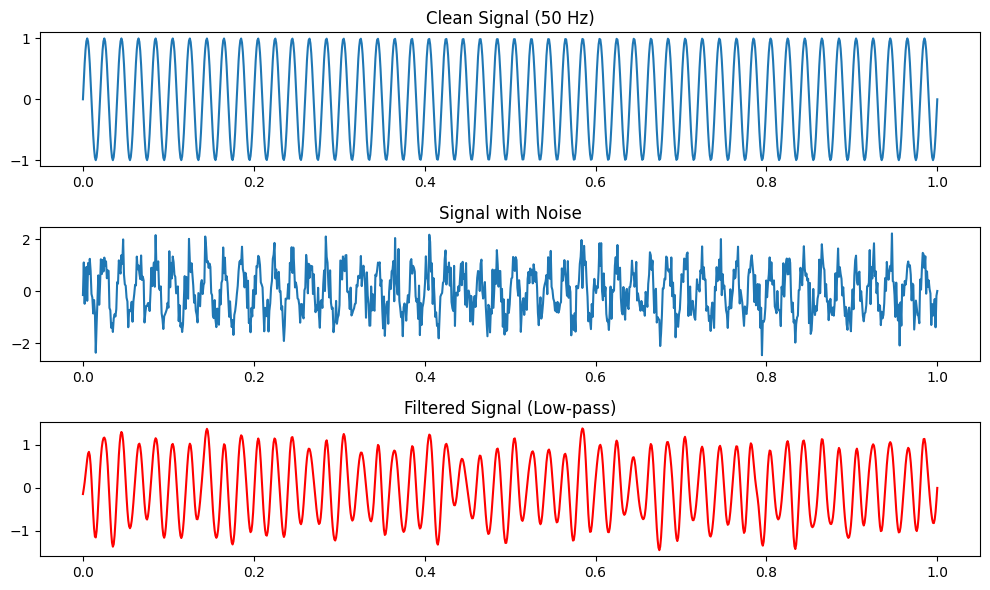

In [10]:
from scipy.signal import butter, filtfilt

# Clean sinusoid
fs = 1000
t = np.linspace(0, 1, fs)
x = np.sin(2*np.pi*50*t)

# Add Gaussian noise
noise = np.random.normal(0, 0.5, len(t))
x_noisy = x + noise

# Low-pass filter design (Butterworth)
cutoff = 100  # cutoff frequency
b, a = butter(6, cutoff/(fs/2), btype='low')
x_filtered = filtfilt(b, a, x_noisy)

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(t, x)
plt.title("Clean Signal (50 Hz)")

plt.subplot(3,1,2)
plt.plot(t, x_noisy)
plt.title("Signal with Noise")

plt.subplot(3,1,3)
plt.plot(t, x_filtered, 'r')
plt.title("Filtered Signal (Low-pass)")

plt.tight_layout()
plt.show()
